## （1）回归分析预测面包价格

用到的核心知识点：**随机梯度下降求解**

$y = w_0 + w_1 * x$

In [7]:
#列表的第一个数据为面包的大小inch：磅，第二个数据为价格

bread_price = [[0.5,5],[0.6,5.5],[0.8,6],[1.1,6.8],[1.4,7]]
 
def step_gradient(b_current, w_current, points, learningRate):
    b_gradient = 0
    w_gradient = 0
    for i in range(len(points)):
        x = points[i][0]
        y = points[i][1]
        b_gradient += -1.0 * (y - ((w_current * x) + b_current))
        w_gradient += -1.0 * x * (y - ((w_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = w_current - (learningRate * w_gradient)
    return [new_b, new_m]
 
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, points, learning_rate)
    return [b, m]
 
def predict(b, m, wheat):
    price = m * wheat + b
    return price

if __name__ == '__main__': 
    #拟合得到的参数
    b1, m1 =  gradient_descent_runner(bread_price, 1, 1, 0.01, 100)

    price = predict(b1, m1, 0.9)
    print ("0.9 吋面包的价格： $ %.2f"% price)

0.9 吋面包的价格： $ 6.08


## （2）使用Scikit-learn

/home/ai/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


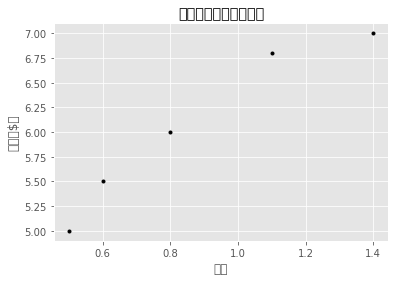

In [8]:
import matplotlib.pyplot as plt
# 为在Matplotlib中显示中文，设置特殊字体
plt.rcParams['font.sans-serif']=['SimHei']

bread_price = [[0.5,5],[0.6,5.5],[0.8,6],[1.1,6.8],[1.4,7]]
X = [[x[0]] for x in bread_price]
y = [[x[-1]] for x in bread_price]

plt.figure()
plt.title('面包价格与英寸对比图')
plt.xlabel('英寸')
plt.ylabel('价格（$）')
plt.plot(X, y, 'k.')
plt.grid(True)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
#(1)导入模型
model = LinearRegression()
#（2）数据拟合
model.fit(X, y)
#（3）新样本预测
price = model.predict([[0.9]])
print('0.9 吋面包的价格： $ %.2f' %price[0])

0.9 吋面包的价格： $ 6.10


In [10]:
print("w0 = ",model.intercept_)   #输出截距，即w0 
print("W1 = ", model.coef_)         #输出每个特征的权值


w0 =  [4.10729927]
W1 =  [[2.2189781]]


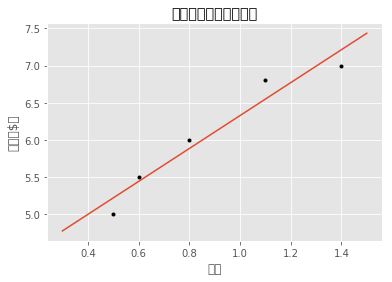

In [11]:
bread_price = [[0.5,5],[0.6,5.5],[0.8,6],[1.1,6.8],[1.4,7]]
X = [[x[0]] for x in bread_price]
y = [[x[-1]] for x in bread_price]

plt.figure()
plt.title('面包价格与英寸对比图')
plt.xlabel('英寸')
plt.ylabel('价格（$）')
plt.plot(X, y, 'k.')
plt.grid(True)

#画出来拟合的曲线
import numpy as np
w_0 = model.intercept_[0]
w_1 = model.coef_[0,0]
x = np.linspace(0.3,1.5,50)
y_ = w_0 + w_1 * x
plt.plot(x, y_, '-')
plt.show()

## (2) 波士顿房价预测

### 1) 导入波士顿房屋数据

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()

In [13]:
print(boston.data.shape)

(506, 13)


此处boston为一个类字典Dictionary对象，即是一个Map容器，我们可以用它的keys()方法输出它包含的属性值。

In [14]:
boston.keys()

dict_keys(['target', 'filename', 'data', 'feature_names', 'DESCR'])

In [15]:
boston.filename

'/usr/local/lib/python3.5/dist-packages/sklearn/datasets/data/boston_house_prices.csv'

In [16]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [17]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [18]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### 2)利用Pandas处理数据

In [19]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


### 3) 添加列的名称

In [10]:
bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


### 4) price在哪里？我们来添加一预测属性

In [20]:
bos['PRICE']= boston.target
print(bos.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  PRICE  
0  396.90  4.98   24.0  
1  396.90  9.14   21.6  
2  392.83  4.03   34.7  
3  394.63  2.94   33.4  
4  396.90  5.33   36.2  


### 5) 输出数据库统计信息

In [21]:
print(bos.describe())

                0           1           2           3           4           5  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

                6           7           8           9          10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### 6) 分割训练-测试集合

约定的符号： 大写的X表示特征向量（13个） 小写的y表示预测的值（1个）

In [22]:
X = bos.drop('PRICE', axis = 1)  #删除列名为PRICE的列，坐标轴为列（1），如果为0表示行
y = bos['PRICE']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


### 7） 导入线性回归模型

In [25]:
# 导入线性回归模块
from sklearn.linear_model import LinearRegression

#模型训练
LR = LinearRegression()
LR.fit(X_train, y_train)

#在测试集合上预测
y_pred = LR.predict(X_test)

### 8）绘制预测结果

Text(30, 40, 'predict line')

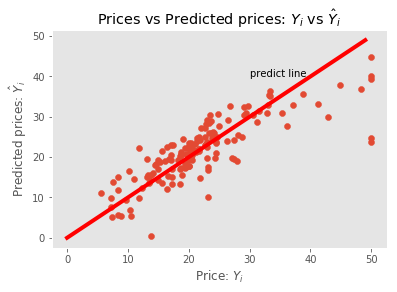

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.scatter(y_test, y_pred)
plt.xlabel("Price: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid()

x = np.arange(0,50)
y = x 
plt.plot(x,y, color = 'red', lw = 4)
plt.text(30,40, "predict line")
#plt.savefig("price.eps")

### 9) 评估模型

In [27]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)
# 输出平方均差，越小越好
print(mse)

27.195965766883308


### 10） 输出拟合系数

In [28]:
print(LR.intercept_)   #截距，即w0，常量
print(LR.coef_)

37.937107741833294
[-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]


In [29]:
type(LR.coef_)

numpy.ndarray

In [30]:
#重新设置numpy格式，便于观察

np.set_printoptions(precision = 3, suppress = True)
print('w0 = {0:.3f}'.format(LR.intercept_))
print('W = {}'.format(LR.coef_))


w0 = 37.937
W = [ -0.121   0.044   0.011   2.511 -16.231   3.859  -0.01   -1.5     0.242
  -0.011  -1.018   0.007  -0.487]


In [35]:
cof = np.around(LR.coef_, decimals = 3)

cof

array([ -0.121,   0.044,   0.011,   2.511, -16.231,   3.859,  -0.01 ,
        -1.5  ,   0.242,  -0.011,  -1.018,   0.007,  -0.487])

In [31]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [36]:
np.set_printoptions(precision = 3, suppress = True)
zip_list = list(zip(cof, boston.feature_names))
zip_list

[(-0.121, 'CRIM'),
 (0.044, 'ZN'),
 (0.011, 'INDUS'),
 (2.511, 'CHAS'),
 (-16.231, 'NOX'),
 (3.859, 'RM'),
 (-0.01, 'AGE'),
 (-1.5, 'DIS'),
 (0.242, 'RAD'),
 (-0.011, 'TAX'),
 (-1.018, 'PTRATIO'),
 (0.007, 'B'),
 (-0.487, 'LSTAT')]

## 观察：

3.859, 'RM'  房间多，房屋面积大，房间高

-16.231, 'NOX'，一氧化氮的浓度越大，说明该地区污染严重，对房价有明显的抑制作用

以上符合我们的实际生活观察

### 11）显示测试集上的预测值和实际价格对比

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
329,22.6,24.935708
371,50.0,23.751632
219,23.0,29.326383
403,8.3,11.975346
78,21.2,21.372725
15,19.9,19.191485
487,20.6,20.571748
340,18.7,21.211540
310,16.1,19.045720
102,18.6,20.354632
